In [1]:
# 7 train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [5]:
# look at 7 line only
seven_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('7')]

In [4]:
# look at all station names
seven_train_all['STATION'].unique()

array(['103 ST-CORONA', '111 ST', '33 ST-RAWSON ST', '34 ST-HUDSON YD',
       '40 ST LOWERY ST', '42 ST-BRYANT PK', '42 ST-PORT AUTH',
       '46 ST BLISS ST', '5 AVE', '52 ST', '61 ST WOODSIDE', '69 ST',
       '74 ST-BROADWAY', '82 ST-JACKSON H', '90 ST-ELMHURST', 'COURT SQ',
       'FLUSHING-MAIN', 'GRD CNTRL-42 ST', 'HUNTERS PT AV',
       'JKSN HT-ROOSVLT', 'JUNCTION BLVD', 'METS-WILLETS PT',
       'QUEENSBORO PLZ', 'TIMES SQ-42 ST', 'VERNON-JACKSON'], dtype=object)

In [6]:
# check station count
seven_train_all['STATION'].count()

28

In [8]:
# clean station names
# needs further cleaning
seven_train_all["STATION"].replace("JKSN HT-ROOSVLT", value="74 ST-BROADWAY", inplace=True)
seven_train_all["STATION"].replace("42 ST-BRYANT PK", value="5 AVE", inplace=True)
seven_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)

In [11]:
# now sum same name rows
seven_commuters = seven_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
seven_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
103 ST-CORONA,22039.0,1903.0
111 ST,16416.0,1219.0
33 ST-RAWSON ST,1242.0,3821.0
34 ST-HUDSON YD,1988.0,14959.0
40 ST LOWERY ST,3755.0,1641.0


In [12]:
# order stations in excel
# save as csv
seven_commuters.to_csv('seven_commuters.csv')

In [13]:
# open ordered CSV
csv_path_7 = 'seven_commuters_order.csv'
seven_commuters_order = pd.read_csv(csv_path_7, encoding="utf-8")
seven_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,FLUSHING-MAIN,31356,8331
1,METS-WILLETS PT,2277,997
2,111 ST,16416,1219
3,103 ST-CORONA,22039,1903
4,JUNCTION BLVD,19452,1965


In [14]:
seven_commuters_order['AM_AVG_ENTER'] = seven_commuters_order['AM_ENTERS']/5

In [15]:
seven_commuters_order['AM_AVG_EXIT'] = seven_commuters_order['AM_EXITS']/5
seven_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,FLUSHING-MAIN,31356,8331,6271.2,1666.2
1,METS-WILLETS PT,2277,997,455.4,199.4
2,111 ST,16416,1219,3283.2,243.8
3,103 ST-CORONA,22039,1903,4407.8,380.6
4,JUNCTION BLVD,19452,1965,3890.4,393.0


In [16]:
# order stations in excel
# save as csv
seven_commuters_order.to_csv('seven_commuters_final.csv')

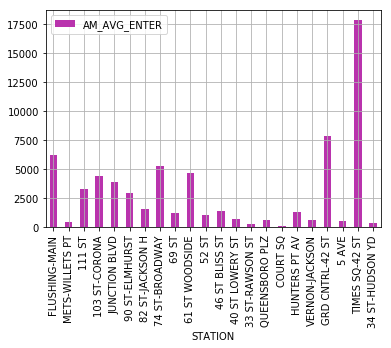

In [17]:
# graph 7 Train AM AVG ENTERS
plt = seven_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#B933AD')
plt.grid()

# save the fig
plt.figure.savefig('7-AM-enter.pdf')

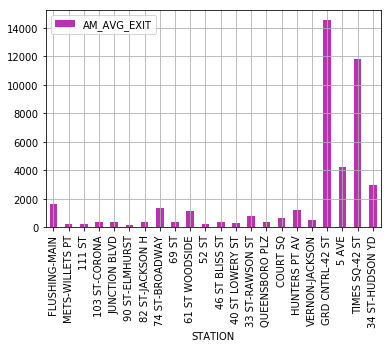

In [18]:
# graph 7 Train PM AVG EXITS
plt = seven_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#B933AD')
plt.grid()

# save the fig
plt.figure.savefig('7-AM-exit.pdf')